데이타 로드  
결측치 채우기  
시각화  
전처리  
범주형 데이터 레이블 인코딩  
train_test_split  
Standard Scaler  
모델정의 분류 or 회귀  
단일 모델 학습 추론  
GridSearchCV  


In [53]:
import pandas as pd
df = pd.read_csv('bike_sharing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


array([[<Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>, <Axes: >]], dtype=object)

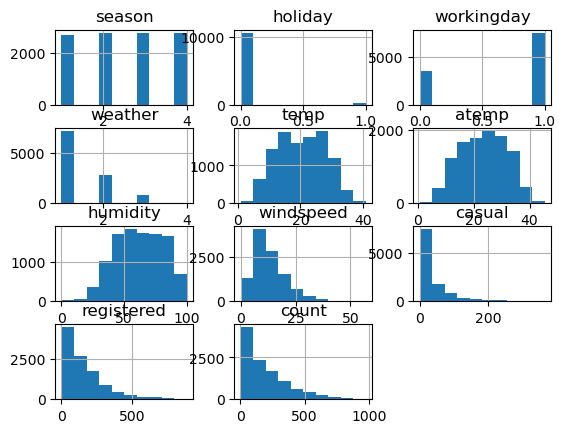

In [54]:
df.hist()

In [55]:
#시간 피처 분리하기
df['datetime'] = pd.to_datetime(df['datetime'])

# 새로운 피처 추출
df['year'] = df['datetime'].dt.year        # 연도
df['month'] = df['datetime'].dt.month      # 월
df['day'] = df['datetime'].dt.day          # 일
df['hour'] = df['datetime'].dt.hour        # 시간
df['weekday'] = df['datetime'].dt.weekday  # 요일 (0: 월요일, 6: 일요일)
df = df.drop('datetime', axis = 1)

In [56]:
# df['year'] = df['datetime'].dt.year
# df['month'] = df['datetime'].dt.month
# df['day'] = df['datetime'].dt.day
# df['hour'] = df['datetime'].dt.hour
# df['weekday'] = df['datetime'].dt.weekday

In [57]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


In [58]:
#결측치 채우기
numeric_columns = df.select_dtypes(include=['int64','float']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

object_columns = df.select_dtypes(include = ['object'] ) .columns
df[object_columns] = df[object_columns].fillna(df[object_columns].mode().iloc(0))

In [59]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
cat_col = ['season', 'holiday','workingday','weather', 'year', 'month', 'day','hour', 'weekday']
le = LabelEncoder()

for col in cat_col:
    df[col] = le.fit_transform(df[col])

df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,0,0,0,0,9.84,14.395,81,0.0,3,13,16,0,0,0,0,5
1,0,0,0,0,9.02,13.635,80,0.0,8,32,40,0,0,0,1,5
2,0,0,0,0,9.02,13.635,80,0.0,5,27,32,0,0,0,2,5
3,0,0,0,0,9.84,14.395,75,0.0,3,10,13,0,0,0,3,5
4,0,0,0,0,9.84,14.395,75,0.0,0,1,1,0,0,0,4,5


In [60]:
scaler = StandardScaler()
num_col = ['temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered']

df[num_col] = scaler.fit_transform(df[num_col])
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,0,0,0,0,-1.333661,-1.092737,0.993213,-1.567754,-0.660992,-0.943854,16,0,0,0,0,5
1,0,0,0,0,-1.438907,-1.182421,0.941249,-1.567754,-0.560908,-0.818052,40,0,0,0,1,5
2,0,0,0,0,-1.438907,-1.182421,0.941249,-1.567754,-0.620958,-0.851158,32,0,0,0,2,5
3,0,0,0,0,-1.333661,-1.092737,0.681430,-1.567754,-0.660992,-0.963717,13,0,0,0,3,5
4,0,0,0,0,-1.333661,-1.092737,0.681430,-1.567754,-0.721042,-1.023307,1,0,0,0,4,5


In [61]:
from sklearn.model_selection import train_test_split

In [71]:
X = df.drop('count', axis = 1)
y = df['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape, y_train.shape)

(8708, 15) (8708,)


In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

In [75]:
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
lgbm = LGBMRegressor()

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_pred, y_test)

print(mse)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
mse = mean_squared_error(y_pred, y_test)

print(mse)

lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
mse = mean_squared_error(y_pred, y_test)

print(mse)

8.904387465564739
27.569361967926856
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 801
[LightGBM] [Info] Number of data points in the train set: 8708, number of used features: 15
[LightGBM] [Info] Start training from score 191.958774
13.477640666719719


In [81]:
# grid search cv 해보기

from sklearn.model_selection import GridSearchCV

models = [
    ('rf', rf, {'n_estimators' : [1000], 'max_depth':[1000]}), 
    ('gb', gb, {'n_estimators' : [1000], 'max_depth':[1000], 'min_samples_split': [3, 6]}), 
    ('lgbm', lgbm, {'n_estimators' : [1000], 'max_depth':[1000], 'learning_rate': [0.1]}),
]


In [82]:
best_models = {}
for model_name, model, param in models:
    gscv = GridSearchCV(model, param, cv = 3, n_jobs = -1, verbose = 1)
    gscv.fit(X_train, y_train)
    print(f"{model_name}: {gscv.best_score_}, {gscv.best_params_}")
    best_models[model_name] = gscv.best_estimator_

Fitting 3 folds for each of 1 candidates, totalling 3 fits
rf: 0.9994942614769445, {'max_depth': 1000, 'n_estimators': 1000}
Fitting 3 folds for each of 2 candidates, totalling 6 fits
gb: 0.9992037345806944, {'max_depth': 1000, 'min_samples_split': 6, 'n_estimators': 1000}
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000714 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 801
[LightGBM] [Info] Number of data points in the train set: 8708, number of used features: 15
[LightGBM] [Info] Start training from score 191.958774
lgbm: 0.999434645748796, {'learning_rate': 0.1, 'max_depth': 1000, 'n_estimators': 1000}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000676 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 790
[LightGBM] [Info] Number of data points i

In [83]:
best_model = best_models['gb']
print(best_model)

GradientBoostingRegressor(max_depth=1000, min_samples_split=6,
                          n_estimators=1000)


In [87]:
from sklearn.ensemble import VotingRegressor
estimators = [ #튜플을 담은 리스트 자료구조 ('이름', 모델)
    ('gb', best_models['gb']),
    ('rf', best_models['rf']),
    ('lgbm', best_models['lgbm'])
]
voting_cls = VotingRegressor(estimators=estimators, )
voting_cls.fit(X_train, y_train)
y_pred = voting_cls.predict(X_test)
acc = mean_squared_error(y_test, y_pred)
print(acc)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000597 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 801
[LightGBM] [Info] Number of data points in the train set: 8708, number of used features: 15
[LightGBM] [Info] Start training from score 191.958774
7.3675610852525475


In [98]:
import pandas as pd

# 예시 데이터프레임
data = {
    'userid': ['user1', 'user2','user2','user2', 'user1', 'user2', 'user3', 'user4', 'user1', 'user2'],
    'timestamp': [
        '2023-05-01', '2023-05-15','2023-05-19', '2023-05-29','2023-05-10', '2023-06-20', '2023-07-05', 
        '2023-07-25', '2023-08-15', '2023-09-10'
    ]
}
df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['timestamp'])


In [99]:

# 5월부터 9월까지 해당하는 월을 추출
df = df[df['timestamp'].dt.month.isin([5, 6, 7, 8, 9])]
df

,userid,timestamp
0,user1,2023-05-01
1,user2,2023-05-15
2,user2,2023-05-19
3,user2,2023-05-29
4,user1,2023-05-10
5,user2,2023-06-20
6,user3,2023-07-05
7,user4,2023-07-25
8,user1,2023-08-15
9,user2,2023-09-10


In [100]:
df.groupby([df['timestamp'].dt.month, 'userid']).size()

timestamp  userid
5          user1     2
           user2     3
6          user2     1
7          user3     1
           user4     1
8          user1     1
9          user2     1
dtype: int64

In [101]:

# 각 월별로 userid의 timestamp 기록 수를 계산
mau_counts = df.groupby([df['timestamp'].dt.month, 'userid']).size().reset_index(name='count')
mau_counts

,timestamp,userid,count
0,5,user1,2
1,5,user2,3
2,6,user2,1
3,7,user3,1
4,7,user4,1
5,8,user1,1
6,9,user2,1


In [102]:

# 월별로 timestamp 기록이 2회 이상인 userid를 필터링
mau_counts = mau_counts[mau_counts['count'] >= 2]
print(mau_counts)



   timestamp userid  count
0          5  user1      2
1          5  user2      3


In [103]:
# 각 월별 MAU 계산
monthly_mau = mau_counts.groupby('timestamp')['userid'].nunique().reset_index(name='MAU')

print(monthly_mau)

   timestamp  MAU
0          5    2
